In [1]:
import h5py
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.lines import Line2D
from pandas.tseries.offsets import MonthEnd

# Données

In [2]:
quotes = pd.read_hdf("data/quotes/quotes_pol_allpol1.h5")
ed_quotes = quotes[quotes['alignement_politique'] == 'extremedroite_droiteradicale'].copy()

In [3]:
articles = pd.read_hdf("data/quotes/articles_notext.h5")

In [4]:
presi_dates = [
    "26/04/1981", "10/05/1981",
    "24/04/1988", "08/05/1988",
    "23/04/1995", "07/05/1995",
    "21/04/2002", "05/05/2002",
    "22/04/2007", "06/05/2007",
    "22/04/2012", "06/05/2012",
    "21/04/2017", "07/05/2017",
    "10/04/2022", "24/04/2022"]
presi_months = pd.to_datetime(presi_dates, dayfirst=True).to_period('M').drop_duplicates()

legi_dates = [
    "14/06/1981", "21/06/1981",
    "16/03/1986",
    "05/06/1988", "11/06/1988",
    "21/03/1993", "28/03/1993",
    "25/05/1997", "01/06/1997",
    "09/06/2002", "16/06/2002",
    "10/06/2007", "17/06/2007",
    "10/06/2012", "17/06/2012",
    "11/06/2017", "18/06/2017",
    "12/06/2022", "19/06/2022",
    "29/06/2024", "06/07/2024"]
legi_months = pd.to_datetime(legi_dates, dayfirst=True).to_period('M').drop_duplicates()

regio_dates = [
    "16/03/1986",
    "22/03/1992",
    "15/03/1998",
    "21/03/2004", "28/03/2004",
    "14/03/2010", "21/03/2010",
    "06/12/2015", "13/12/2015",
    "20/06/2021", "27/06/2021"]
regio_months = pd.to_datetime(regio_dates, dayfirst=True).to_period('M').drop_duplicates()

canto_dates = [
    "14/03/1982", "21/03/1982",
    "10/03/1985", "17/03/1985",
    "25/09/1988", "02/10/1988",
    "20/03/1992", "27/03/1992",
    "15/03/1998", "22/03/1998",
    "11/03/2001", "18/03/2001",
    "21/03/2004", "28/03/2004",
    "9/03/2008", "16/03/2008",
    "20/03/2011", "27/03/2011"]
canto_months = pd.to_datetime(canto_dates, dayfirst=True).to_period('M').drop_duplicates()

dept_dates = [
    "22/03/2015", "29/03/2015",
    "20/06/2021", "27/06/2021"]
dept_months = pd.to_datetime(dept_dates, dayfirst=True).to_period('M').drop_duplicates()

muni_dates = [
    "06/03/1983", "13/03/1983",
    "12/03/1989", "19/03/1989",
    "11/06/1995", "18/06/1995",
    "11/03/2001", "18/03/2001",
    "09/03/2008", "16/03/2008",
    "23/03/2014", "30/03/2014",
    "15/03/2020", "28/06/2020"]
muni_months = pd.to_datetime(muni_dates, dayfirst=True).to_period('M').drop_duplicates()

europ_dates = [
    "13/06/1999",
    "13/06/2004",
    "07/06/2009",
    "25/05/2014",
    "26/05/2019",
    "09/06/2024"]
europ_months = pd.to_datetime(europ_dates, dayfirst=True).to_period('M').drop_duplicates()

In [5]:
main_elec_dates = presi_dates + legi_dates + europ_dates
main_elec_months = pd.to_datetime(main_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

other_elec_dates = regio_dates + canto_dates + dept_dates + muni_dates
other_elec_months = pd.to_datetime(other_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

all_elec_dates = presi_dates + legi_dates + regio_dates + canto_dates + dept_dates + muni_dates + europ_dates
all_elec_months = pd.to_datetime(all_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

# 1. Nombre de citations
## 1.1. Absolu

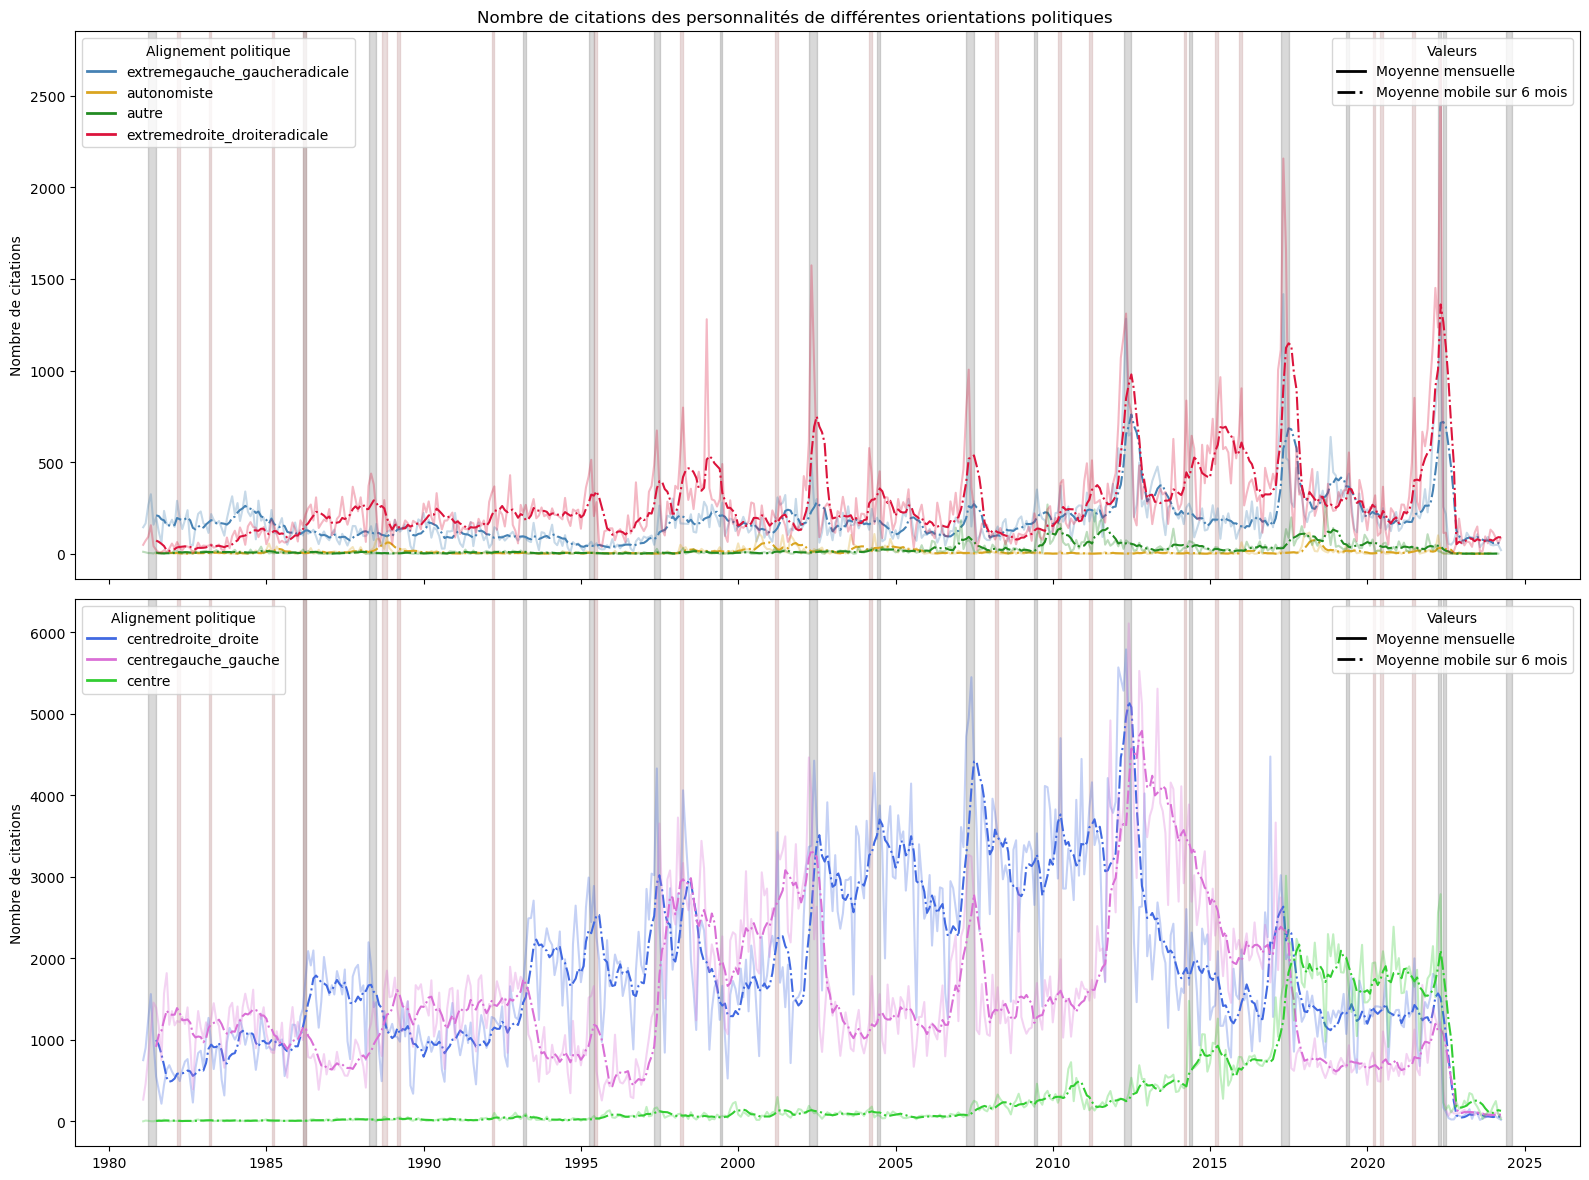

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

alignment_groups = [
    (['extremegauche_gaucheradicale', 'autonomiste', 'autre', 'extremedroite_droiteradicale'],
     {'extremegauche_gaucheradicale': 'steelblue',
      'autonomiste': 'goldenrod',
      'autre': 'forestgreen',
      'extremedroite_droiteradicale': 'crimson'}),
    
    (['centredroite_droite', 'centregauche_gauche', 'centre'],
     {'centredroite_droite': 'royalblue',
      'centregauche_gauche': 'orchid',
      'centre': 'limegreen'})
]

for ax, (political_alignments, colors) in zip(axes, alignment_groups):
    alignment_handles = []

    for alignment in political_alignments:
        subset_quotes = quotes[quotes['alignement_politique'] == alignment]  
        monthly_counts = subset_quotes.groupby(pd.Grouper(key='date', freq='ME')).size().reset_index(name='quote_count')
        monthly_counts.columns = ['Mois', 'Citations']
        monthly_counts['MA'] = monthly_counts['Citations'].rolling(window=6).mean()

        ax.plot(monthly_counts['Mois'], monthly_counts['Citations'], color=colors[alignment], alpha=0.3)
        ax.plot(monthly_counts['Mois'], monthly_counts['MA'], color=colors[alignment], linestyle='dashdot')
        alignment_handles.append(Line2D([0], [0], color=colors[alignment], lw=2, label=alignment))

    alignment_legend = ax.legend(handles=alignment_handles, title="Alignement politique", loc="upper left")
    ax.add_artist(alignment_legend)

    line_type_handles = [
        Line2D([0], [0], color='black', lw=2, label="Moyenne mensuelle"),
        Line2D([0], [0], color='black', lw=2, linestyle='dashdot', label="Moyenne mobile sur 6 mois")
    ]
    ax.legend(handles=line_type_handles, title="Valeurs", loc="upper right")

    start_period = None
    for i, period in enumerate(main_elec_months):
        if start_period is None:
            start_period = period
        if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
            end_period = period
            start = start_period.to_timestamp()
            end = (end_period + MonthEnd(1)).to_timestamp()
            ax.axvspan(start, end, color='black', alpha=0.15)
            start_period = None

    start_period = None
    for i, period in enumerate(other_elec_months):
        if start_period is None:
            start_period = period
        if i == len(other_elec_months) - 1 or other_elec_months[i + 1] != period + 1:
            end_period = period
            start = start_period.to_timestamp()
            end = (end_period + MonthEnd(1)).to_timestamp()
            ax.axvspan(start, end, color='rosybrown', alpha=0.3)
            start_period = None

    ax.set_ylabel("Nombre de citations")

axes[-1].set_xlabel("")

plt.suptitle("Nombre de citations des personnalités de différentes orientations politiques")
plt.tight_layout()
plt.show()

## 1.2. Par article

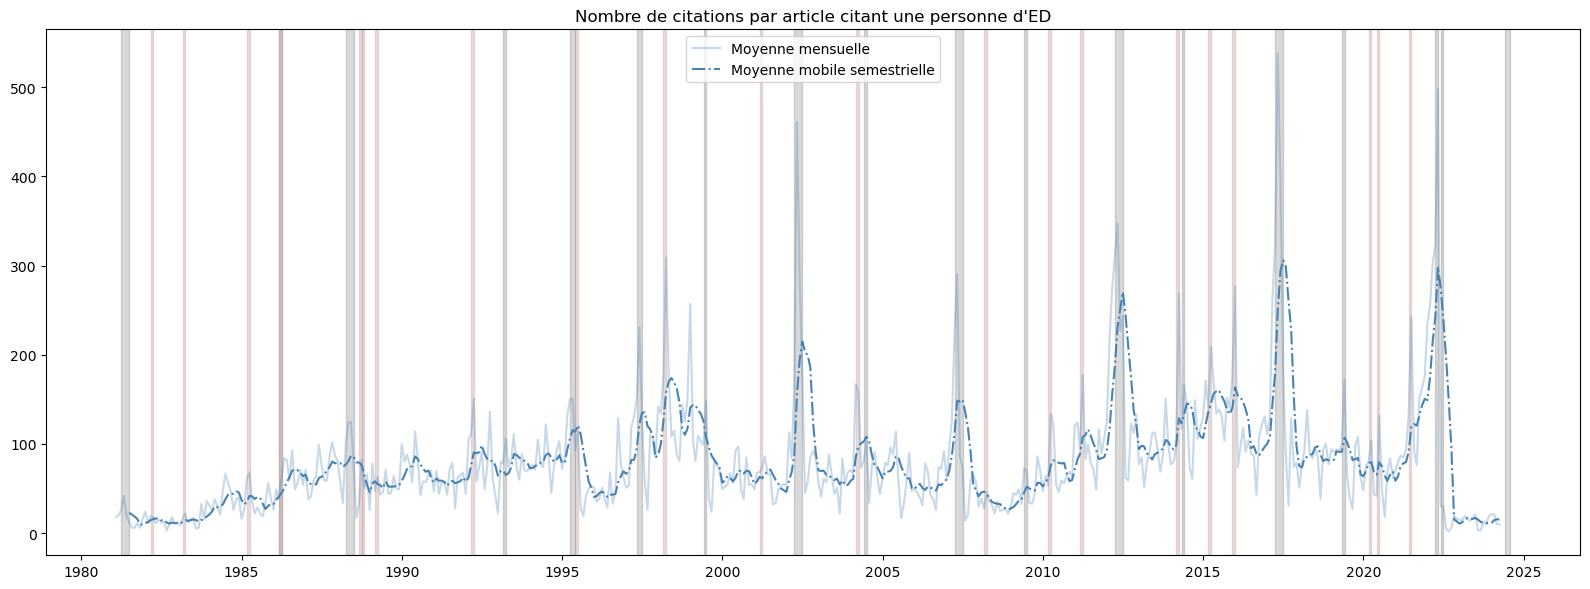

In [7]:
quotes_per_article_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['text_id'].nunique().reset_index()
quotes_per_article_monthly.columns = ['Mois', 'Nb cit']
quotes_per_article_monthly['6_month_MA'] = quotes_per_article_monthly['Nb cit'].rolling(window=6).mean()

plt.figure(figsize=(16, 6))
plt.plot(quotes_per_article_monthly['Mois'], quotes_per_article_monthly['Nb cit'], linestyle='-', color='steelblue', label='Moyenne mensuelle', alpha=0.3)
plt.plot(quotes_per_article_monthly['Mois'], quotes_per_article_monthly['6_month_MA'], linestyle='dashdot', color='steelblue', label='Moyenne mobile semestrielle')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.xlabel('')
plt.ylabel('')
plt.title("Nombre de citations par article citant une personne d'ED")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Longueur des citations
## 2.1. Absolue

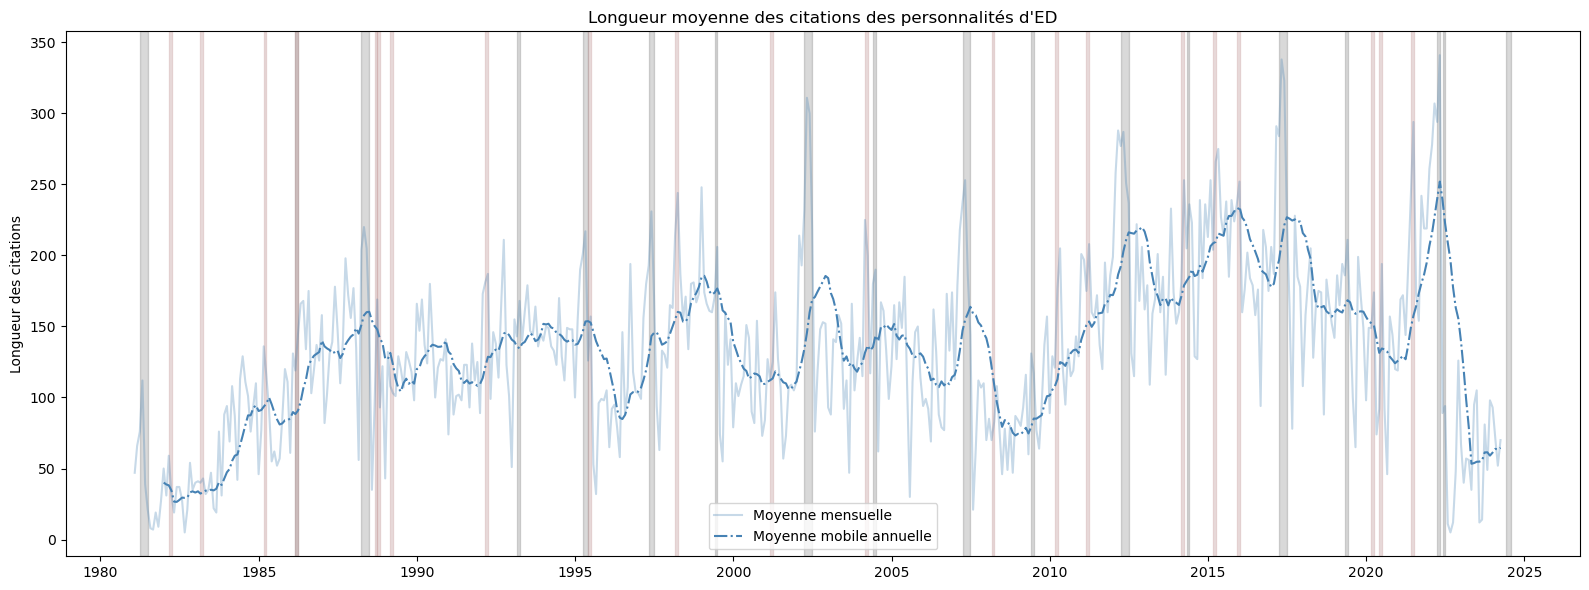

In [8]:
ed_quotes['quote_length'] = ed_quotes['quote_text'].apply(lambda x: len(x.strip('« » ')))
quote_length_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['quote_length'].nunique().reset_index()
quote_length_monthly.columns = ['Mois', 'Longueur des citations']
quote_length_monthly['12_month_MA'] = quote_length_monthly['Longueur des citations'].rolling(window=12).mean()

plt.figure(figsize=(16, 6))
plt.plot(quote_length_monthly['Mois'], quote_length_monthly['Longueur des citations'], marker='', linestyle='-', color='steelblue', label='Moyenne mensuelle', alpha=0.3)
plt.plot(quote_length_monthly['Mois'], quote_length_monthly['12_month_MA'], marker='', linestyle='dashdot', color='steelblue', label='Moyenne mobile annuelle')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.xlabel('')
plt.ylabel('Longueur des citations')
plt.title("Longueur moyenne des citations des personnalités d'ED")
plt.legend()
plt.tight_layout()
plt.show()

## 2.2. En proportion de la longueur des articles
Plus possible, la longueur totale des articles n'apparaît plus dans les données.

# 3. Nombre d'articles citant l'ED
## 3.1. ED seule
Avec proportion du total des articles et coloration distincte pour chaque type d'élection.

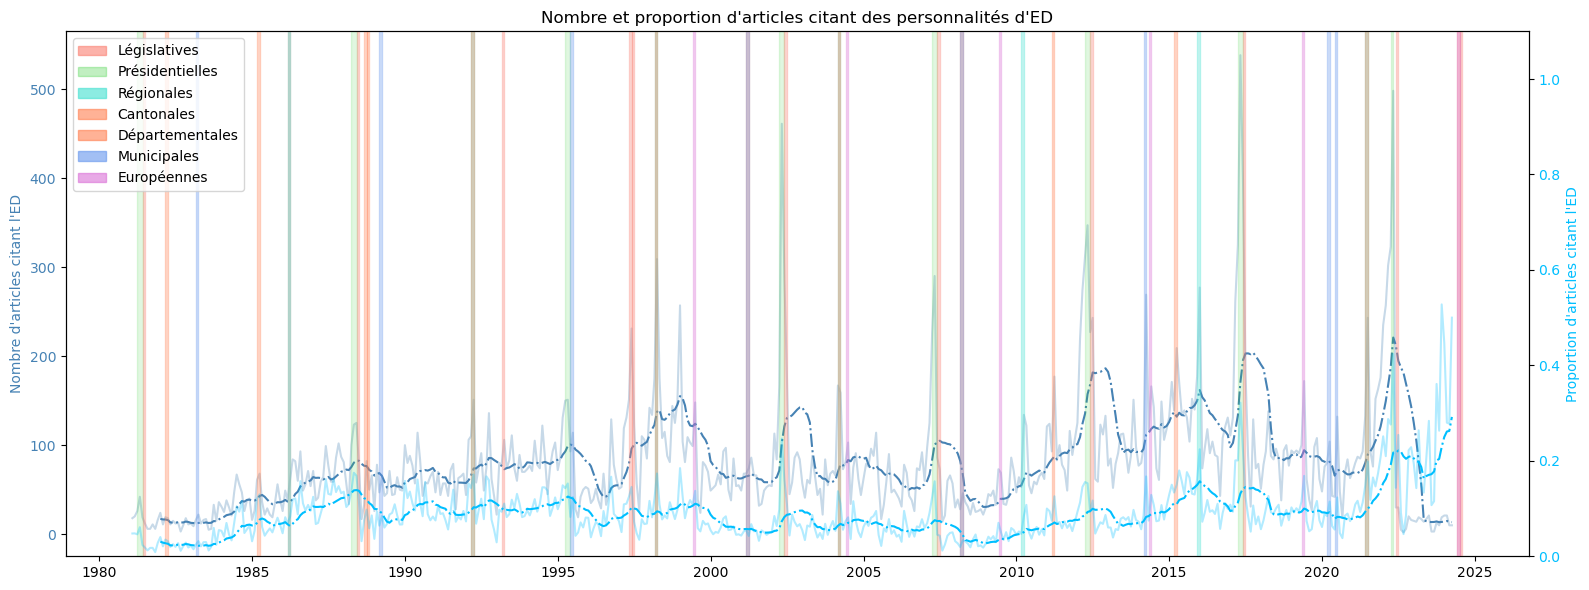

In [9]:
ed_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['text_id'].nunique().reset_index()
ed_monthly['art_12_month_MA'] = ed_monthly['text_id'].rolling(window=12).mean()
ed_monthly.columns = ['Mois', 'Articles', 'Articles_MM']

all_monthly = quotes.groupby(pd.Grouper(key='date', freq='ME'))['text_id'].nunique().reset_index()
all_monthly.columns = ['Mois', 'Articles']

plot_data = pd.merge(all_monthly, ed_monthly, on='Mois', how='left')
plot_data['prop_ed'] = plot_data['Articles_y'] / plot_data['Articles_x']
plot_data['prop_ed_MM'] = plot_data['prop_ed'].rolling(window=12).mean()

fig, ax1 = plt.subplots(figsize=(16, 6))

# Effectifs
ax1.plot(plot_data['Mois'], plot_data['Articles_y'], marker='', linestyle='-', color='steelblue', alpha=0.3)
ax1.plot(plot_data['Mois'], plot_data['Articles_MM'], marker='', linestyle='dashdot', color='steelblue')
ax1.set_ylabel("Nombre d'articles citant l'ED", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")

# Proportions
ax2 = ax1.twinx()
ax2.plot(plot_data['Mois'], plot_data['prop_ed'], marker='', linestyle='-', color="deepskyblue", alpha=0.3)
ax2.plot(plot_data['Mois'], plot_data['prop_ed_MM'], marker='', linestyle='dashdot', color='deepskyblue')
ax2.set_ylabel("Proportion d'articles citant l'ED", color="deepskyblue")
ax2.tick_params(axis='y', labelcolor="deepskyblue")
ax2.set_ylim(0, 1.1)

# Périodes électorales
start_period = None
for i, period in enumerate(presi_months):
    if start_period is None:
        start_period = period
    if i == len(presi_months) - 1 or presi_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='limegreen', alpha=0.15)
        start_period = None
presi_months_patch = mpatches.Patch(color='limegreen', alpha=0.3, label='Présidentielles')

for period in legi_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='salmon', alpha=0.3)
legi_months_patch = mpatches.Patch(color='salmon', alpha=0.6, label='Législatives')

for period in regio_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='turquoise', alpha=0.3)
regio_months_patch = mpatches.Patch(color='turquoise', alpha=0.6, label='Régionales')

for period in canto_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='coral', alpha=0.3)
canto_months_patch = mpatches.Patch(color='coral', alpha=0.6, label='Cantonales')

for period in dept_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='coral', alpha=0.3)
dept_months_patch = mpatches.Patch(color='coral', alpha=0.6, label='Départementales')

for period in muni_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='cornflowerblue', alpha=0.3)
muni_months_patch = mpatches.Patch(color='cornflowerblue', alpha=0.6, label='Municipales')

for period in europ_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='orchid', alpha=0.3)
europ_months_patch = mpatches.Patch(color='orchid', alpha=0.6, label='Européennes')

plt.legend(handles=[legi_months_patch, presi_months_patch, regio_months_patch, canto_months_patch, dept_months_patch, muni_months_patch, europ_months_patch])

plt.title("Nombre et proportion d'articles citant des personnalités d'ED")
plt.tight_layout()
plt.show()

## 3.2. ED face aux autres partis

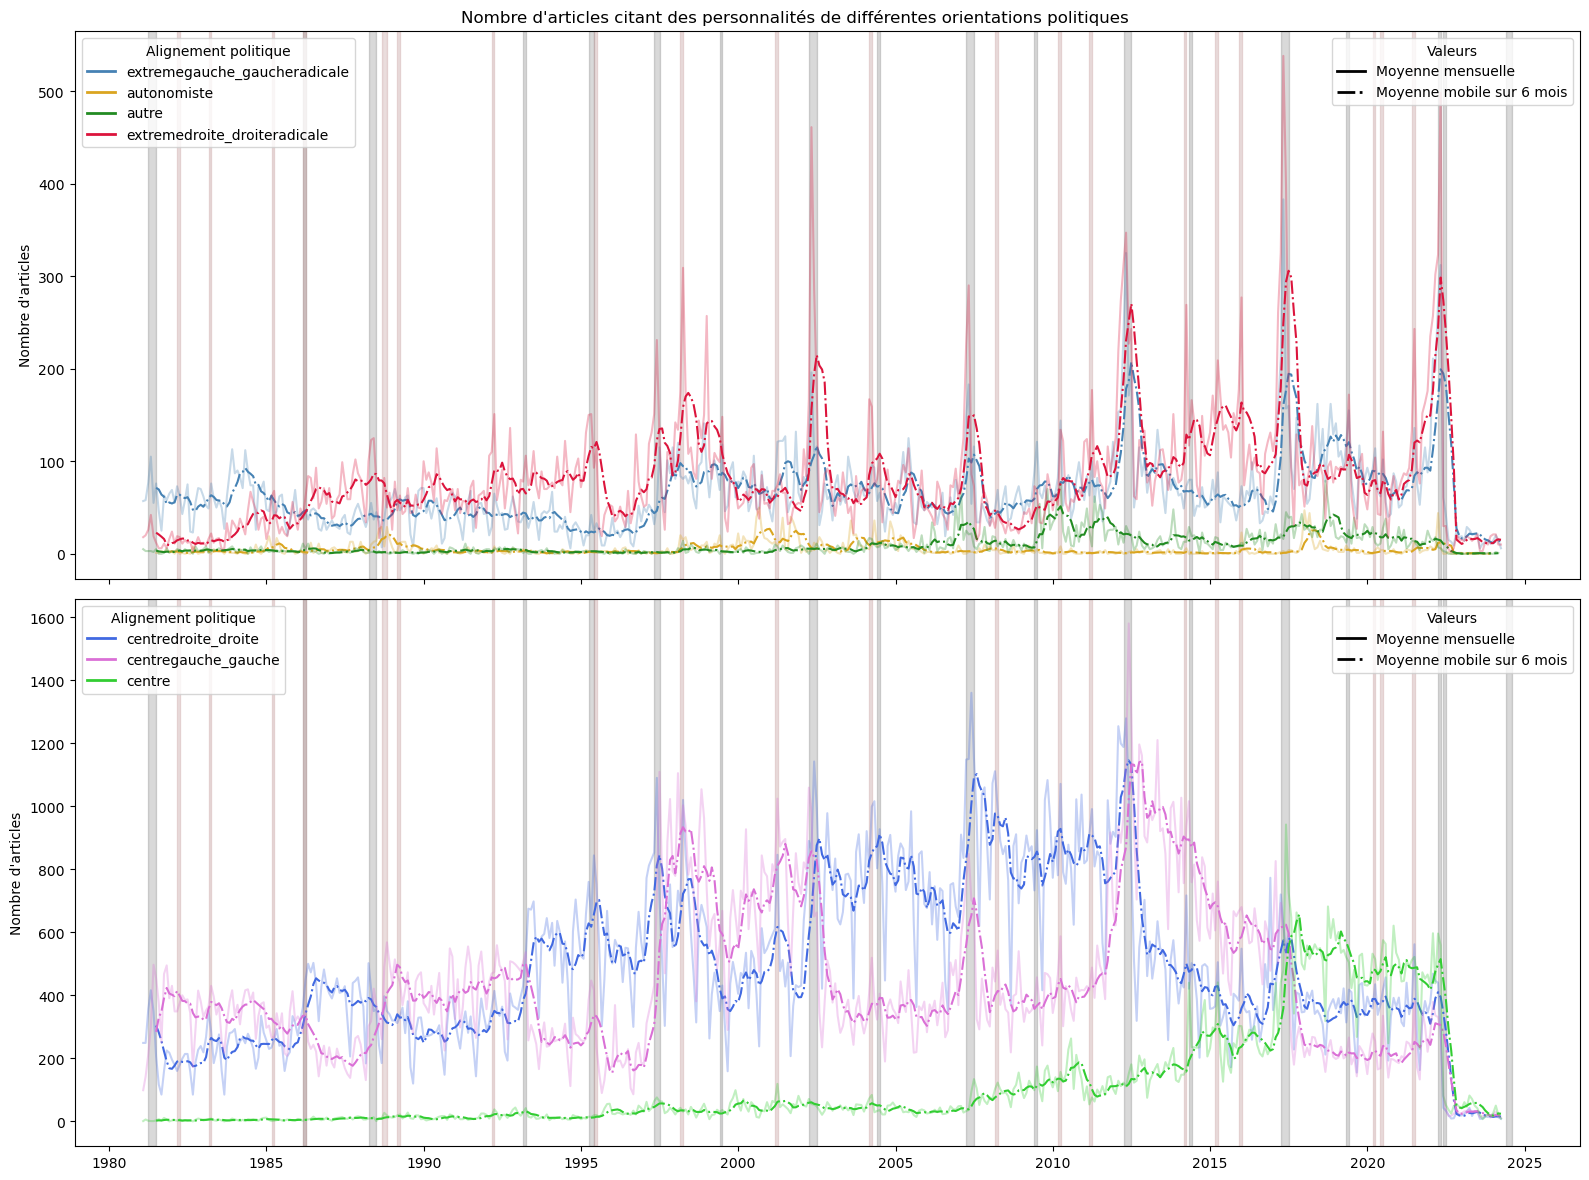

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

alignment_groups = [
    (['extremegauche_gaucheradicale', 'autonomiste', 'autre', 'extremedroite_droiteradicale'],
     {'extremegauche_gaucheradicale': 'steelblue',
      'autonomiste': 'goldenrod',
      'autre': 'forestgreen',
      'extremedroite_droiteradicale': 'crimson'}),
    
    (['centredroite_droite', 'centregauche_gauche', 'centre'],
     {'centredroite_droite': 'royalblue',
      'centregauche_gauche': 'orchid',
      'centre': 'limegreen'})
]

for ax, (political_alignments, colors) in zip(axes, alignment_groups):
    alignment_handles = []

    for alignment in political_alignments:
        subset_quotes = quotes[quotes['alignement_politique'] == alignment]
        monthly_counts = subset_quotes.groupby(pd.Grouper(key='date', freq='ME'))['text_id'].nunique().reset_index()
        monthly_counts.columns = ['Mois', 'Articles']
        monthly_counts['MA'] = monthly_counts['Articles'].rolling(window=6).mean()

        ax.plot(monthly_counts['Mois'], monthly_counts['Articles'], color=colors[alignment], alpha=0.3)
        ax.plot(monthly_counts['Mois'], monthly_counts['MA'], color=colors[alignment], linestyle='dashdot')
        alignment_handles.append(Line2D([0], [0], color=colors[alignment], lw=2, label=alignment))

    alignment_legend = ax.legend(handles=alignment_handles, title="Alignement politique", loc="upper left")
    ax.add_artist(alignment_legend)

    line_type_handles = [
        Line2D([0], [0], color='black', lw=2, label="Moyenne mensuelle"),
        Line2D([0], [0], color='black', lw=2, linestyle='dashdot', label="Moyenne mobile sur 6 mois")
    ]
    ax.legend(handles=line_type_handles, title="Valeurs", loc="upper right")

    start_period = None
    for i, period in enumerate(main_elec_months):
        if start_period is None:
            start_period = period
        if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
            end_period = period
            start = start_period.to_timestamp()
            end = (end_period + MonthEnd(1)).to_timestamp()
            ax.axvspan(start, end, color='black', alpha=0.15)
            start_period = None

    start_period = None
    for i, period in enumerate(other_elec_months):
        if start_period is None:
            start_period = period
        if i == len(other_elec_months) - 1 or other_elec_months[i + 1] != period + 1:
            end_period = period
            start = start_period.to_timestamp()
            end = (end_period + MonthEnd(1)).to_timestamp()
            ax.axvspan(start, end, color='rosybrown', alpha=0.3)
            start_period = None

    ax.set_ylabel("Nombre d'articles")

axes[-1].set_xlabel("")

plt.suptitle("Nombre d'articles citant des personnalités de différentes orientations politiques")
plt.tight_layout()
plt.show()

## 3.3. ED en fonction des journaux

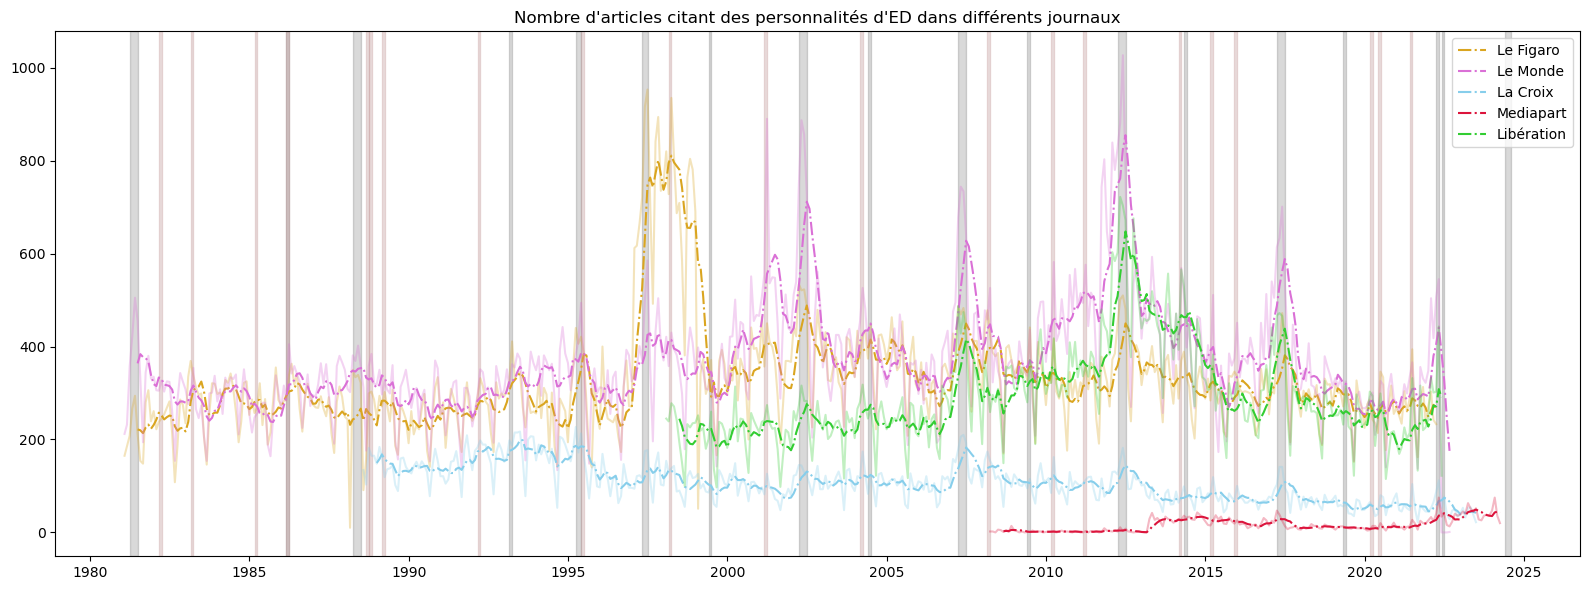

In [11]:
journals = ['Le Figaro', 'Le Monde', 'La Croix', 'Mediapart', 'Libération']
colors = {
    'Le Figaro': 'goldenrod',
    'Libération': 'limegreen',
    'Le Monde': 'orchid',
    'La Croix': 'skyblue',
    'Mediapart': 'crimson'}

plt.figure(figsize=(16, 6))

for journal in journals:
    subset_quotes = quotes[quotes['journal'] == journal]
    monthly_counts = subset_quotes.groupby(pd.Grouper(key='date', freq='ME'))['text_id'].nunique().reset_index()
    monthly_counts.columns = ['Mois', 'Articles']
    monthly_counts['MA'] = monthly_counts['Articles'].rolling(window=6).mean()
    plt.plot(monthly_counts['Mois'], monthly_counts['Articles'], color=colors[journal], alpha=0.3)
    plt.plot(monthly_counts['Mois'], monthly_counts['MA'], label=f"{journal}", color=colors[journal], linestyle='dashdot')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.legend()
plt.title("Nombre d'articles citant des personnalités d'ED dans différents journaux")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 4. Modalités de citation
## 4.1. Type

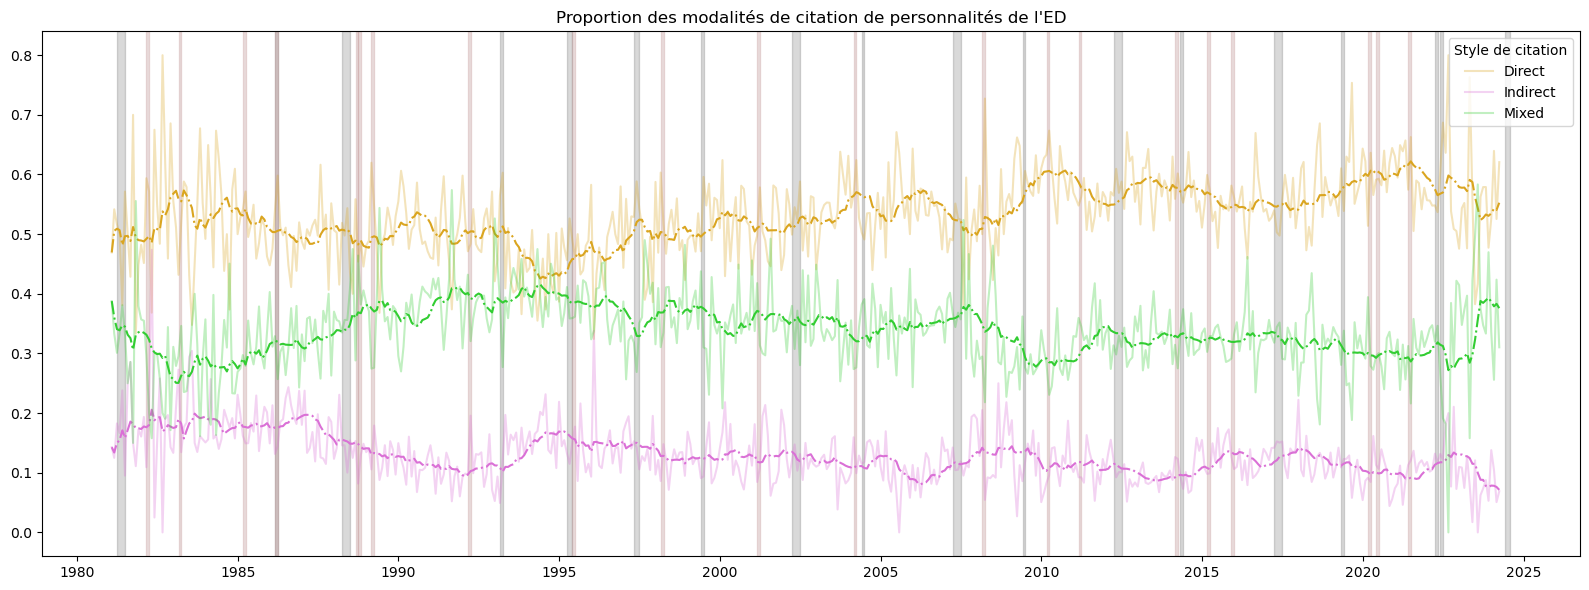

In [12]:
ed_style_monthly = ed_quotes.groupby([pd.Grouper(key='date', freq='ME'), 'quote_type']).size().reset_index(name='count')
ed_style_monthly_pivot = ed_style_monthly.pivot(index='date', columns='quote_type', values='count').fillna(0)
ed_style_monthly_pivot = ed_style_monthly_pivot.div(ed_style_monthly_pivot.sum(axis=1), axis=0)
ed_style_monthly_pivot_ma = ed_style_monthly_pivot.rolling(window=12, min_periods=1).mean()

types = ['Direct', 'Mixed', 'Indirect']
colors = {
    'Direct': 'goldenrod',
    'Mixed': 'limegreen',
    'Indirect': 'orchid'}

plt.figure(figsize=(16, 6))

for style in ed_style_monthly_pivot.columns:
    plt.plot(ed_style_monthly_pivot.index, ed_style_monthly_pivot[style], label=f'{style}',  color=colors[style], alpha=0.3)
    plt.plot(ed_style_monthly_pivot_ma.index, ed_style_monthly_pivot_ma[style], color=colors[style], linestyle='dashdot')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.legend(title="Style de citation")
plt.title("Proportion des modalités de citation de personnalités de l'ED")
plt.tight_layout()
plt.show()

## 4.2. Position
Elle est renseignée dans `quote_span` sous la forme d'un double index de début et de fin. Il n'est pas possible d'en déduire une position absolue faute d'information sur la longueur des articles.

# 5. Journalistes et personnalités

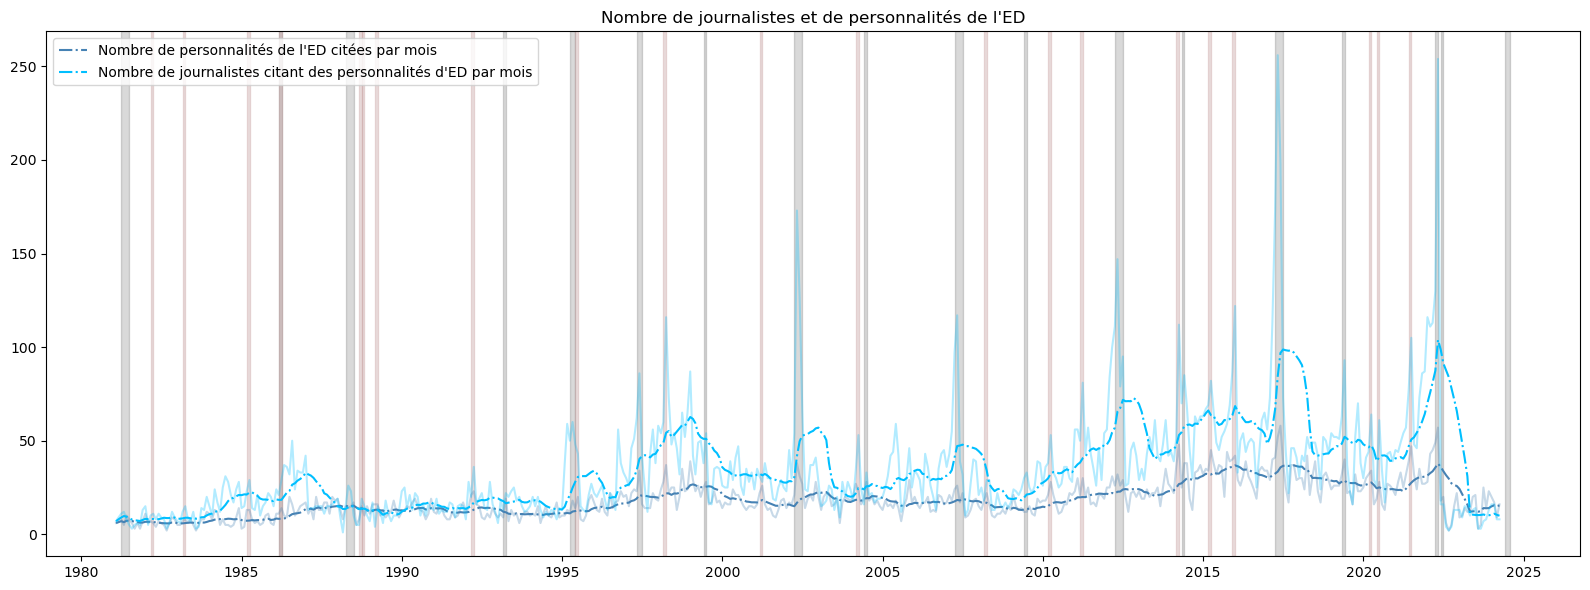

In [13]:
ed_pers_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['person_name_standardized'].nunique().reset_index()
ed_pers_monthly['person_ma'] = ed_pers_monthly['person_name_standardized'].rolling(window=12, min_periods=1).mean()
ed_pers_monthly.columns = ['Mois', 'Personnalités', 'Personnalités MM']

ed_journ_monthly = (
    ed_quotes.explode('author')
    .groupby(pd.Grouper(key='date', freq='ME'))['author']
    .nunique()
    .reset_index()
)
ed_journ_monthly['author_ma'] = ed_journ_monthly['author'].rolling(window=12, min_periods=1).mean()
ed_journ_monthly.columns = ['Mois', 'Journalistes', 'Journalistes MM']
plot_data = pd.merge(ed_pers_monthly, ed_journ_monthly, on='Mois', how='left').fillna(0)

plt.figure(figsize=(16, 6))
plt.plot(plot_data['Mois'], plot_data['Personnalités'], linestyle='-', color='steelblue', label='', alpha=0.3)
plt.plot(plot_data['Mois'], plot_data['Personnalités MM'], linestyle='dashdot', color='steelblue', label="Nombre de personnalités de l'ED citées par mois")
plt.plot(plot_data['Mois'], plot_data['Journalistes'], linestyle='-', color='deepskyblue', alpha=0.3)
plt.plot(plot_data['Mois'], plot_data['Journalistes MM'], linestyle='dashdot', color='deepskyblue', label="Nombre de journalistes citant des personnalités d'ED par mois")

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.legend()
plt.title("Nombre de journalistes et de personnalités de l'ED")
plt.tight_layout()
plt.show()